#Overview

##Business Understanding (Background)

An insurance company is focused on using data analytics to optimize business operations and enhance customer relationships. A cornerstone of this strategy is understanding Customer Lifetime Value (CLV), a metric representing the total profit a customer generates throughout their relationship with the company. By calculating CLV based on premiums, claims, and operational costs, the company can accurately assess customer value and profitability.

The company has amassed a comprehensive dataset encompassing customer demographics, policy details, claims history, and financial information. This data will be leveraged to predict CLV using machine learning models, enabling tailored marketing campaigns, efficient resource allocation, and improved customer retention. Additionally, the dataset will be analyzed to predict claim probability and policy renewal likelihood, informing risk management strategies and personalized offerings.

By segmenting customers based on CLV and utilizing this metric for business decision-making and performance tracking, the company aims to increase profitability, enhance customer satisfaction, and solidify its position in the competitive insurance market.

##Stakeholders

- Marketing Team: CLV insights enable marketers to design targeted campaigns / promotions.

##General Problem

The company aims to increase profitability.

###Problem Statement

-   How can the machine learning model identify prospective customers who will potentially be a loyal customer?

##Objective

- Constructing a robust model for predicting CLV.
- Boosting customer loyalty, and overall profitability through targeted strategies based on CLV insights.

##Research Method








*   Data Cleaning/Preprocess the data.
*   Perform data analysis.
*   Use feature engineering.
*   Develop and benchmark machine learning models to select the most suitable one.
*   Improve the model by conducting hyperparameter tuning to achieve lower error.








###Evaluation Metrics

####Note:
---
$n$ = Total Number of Data<br>
$i$ = Variable i<br>
$Y_i$ = Actual Datal<br>
$\widehat{Y_i}$ = Predicted Data

####RMSE (Root Mean Square Error):
RMSE is a measure of the differences between predicted values and actual values.
It is the square root of the average of the squared differences.
RMSE is useful because it gives an error measure in the same units as the target variable.
- Formula:
$RMSE =   \sqrt{ \frac{ \sum\nolimits_{i=1}^{n} ( Y_i - \widehat{Y_i})^2 }{n} } $


####MAPE (Mean Absolute Percentage Error):
MAPE measures the accuracy of a forecast system as a percentage.
It calculates the average absolute percentage difference between predicted and actual values.
MAPE is easy to interpret because it is expressed as a percentage.
- Formula:
$MAPE =  \frac{1}{n}   \sum_{i=1}^{n} | \frac{Y_i - \widehat{Y_i}}{Y_i}|$

####R2-score:
This measures the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R-squared indicates a better fit of the model to the data.



- $𝑅^{2}$ = 1  		This indicates a perfect fit. The model accounts for all the variability of the dependent variable.
- $𝑅^{2}$ = 0  		This means the model does not account for any of the variability in the dependent variable.
- 0 <$𝑅^{2}$< 1		The model explains some proportion of the variability in the dependent variable.
- $𝑅^{2}$< 0 		The model explains some proportion of the variability in the dependent variable.

#Data

##Dataset Overview

In [ ]:
!pip install phik

In [ ]:
# Import library
# data cleaning, EDA, visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistical study
import statsmodels.api as sm
from scipy.stats import randint
from scipy import stats
from scipy.stats import pearsonr
from phik import phik_matrix
from scipy.stats import chi2_contingency

# for modelling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,r2_score

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

# hyperparameter tuning method
from sklearn.model_selection import RandomizedSearchCV

# model saving
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Original Google Sheets URL
sheet_url = 'https://docs.google.com/spreadsheets/d/1uPR6NJA2QiXU7BgdLNsDE7yaxu4U2NHF436jqBxs4VI/edit?usp=sharing'

# Correct URL format for CSV export
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Read the CSV data into a DataFrame
df = pd.read_csv(csv_url)

# Display the DataFrame

In [ ]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2,90,571.479602,11828,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6,62,114.514440,44762,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2,62,257.248789,21514,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1,116,556.800000,17913,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1,62,355.820799,19030,2372.155492


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   int64  
 7   Monthly Premium Auto     5669 non-null   int64  
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   int64  
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 487.3+ KB


Assumptions of Contribution to CLV and Data Type:
- Categorical Data:
1. `Vehicle Class`	: Higher-end vehicles have higher insurance premiums, increasing the insurer's revenue and CLV.
2. `Coverage` 		: Comprehensive coverage leads to higher premiums, contributing more to the insurer's CLV.
3. `Renew Offer type`	: Attractive renewal offers can boost retention, enhancing CLV.
4. `Employment Status`	: Employed customers are more reliable policyholders, potentially leading to a higher CLV.
5. `Marital Status`	: Married customers may need more comprehensive coverage, increasing CLV.
6. `Education`		: Higher education often leads to higher income and premium coverage, impacting CLV.
7. `Number of Policies`	: More policies held by a customer correlate with higher CLV.

- Numerical Data:
1. `Monthly Premium Auto`	: Higher premiums directly increase the insurer's revenue and CLV.
2. `Total Claim Amount`	: Balancing premiums and claims is essential for maximizing CLV.
3. `Income`		: Higher-income customers tend to purchase more coverage, leading to a higher CLV.
4. `Customer Lifetime Value`: CLV measures the total profit from a customer, influenced the other variables.
- In machine learning modelling we define : `Customer Lifetime Value` as the target and the rest will be independent variables.


##Data Analysis

###Data Cleaning

Identifying and handling anomalies (missing values, outliers, data formatting, and/or duplicate data) in the dataset.

#####Missing Values

Use df.isnull().sum() to examine missing values in a DataFrame (df). This method returns the count of missing values for each column. It's a quick and efficient way to assess how many values are missing in each column of the dataset, which is essential for data cleaning and preparation before analysis or modeling.

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64


From the missing value check, no missing values were found.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   int64  
 7   Monthly Premium Auto     5669 non-null   int64  
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   int64  
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 487.3+ KB


####Outlier

Outliers are data points that differ significantly from most of the data.
A boxplot helps detect them by showing the median.
We also can use interquartile range (IQR) to detect outliers, outliers typically extending 1.5 times the IQR from the quartiles.

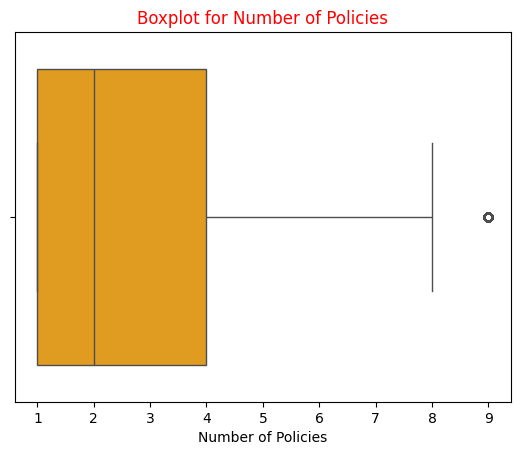

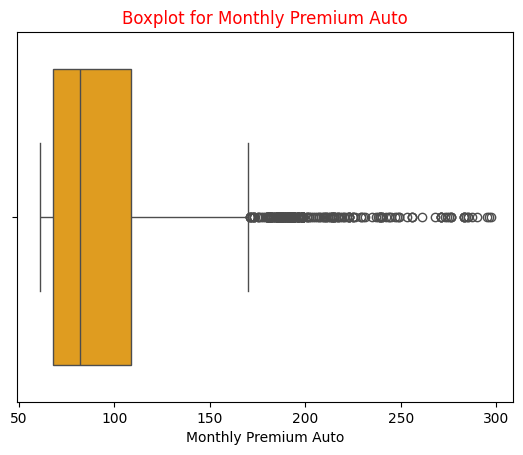

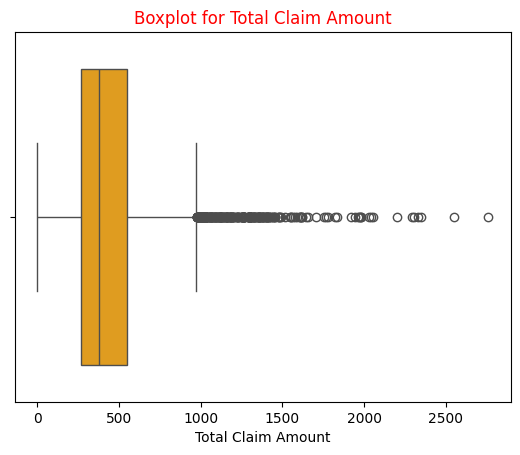

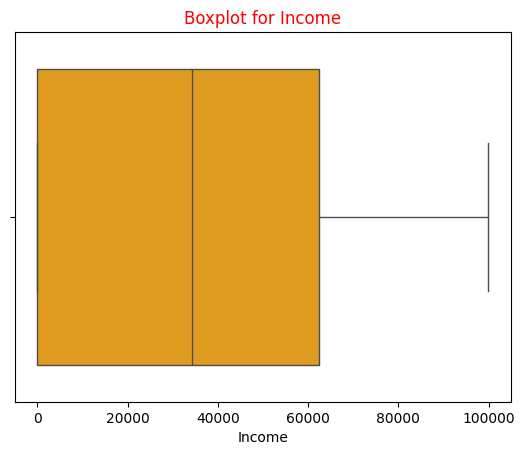

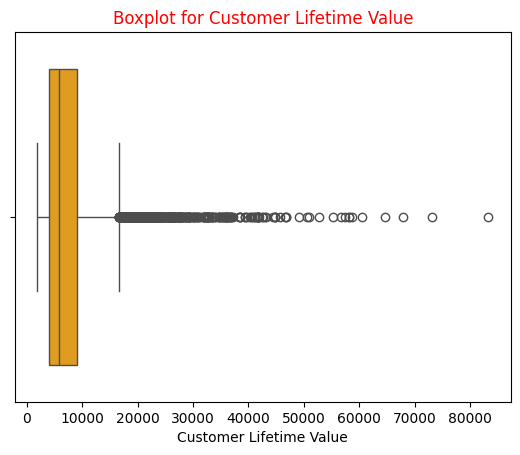

In [ ]:
# Boxplot Data Distribution
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure()
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot for {column}', color='red')
    plt.show()

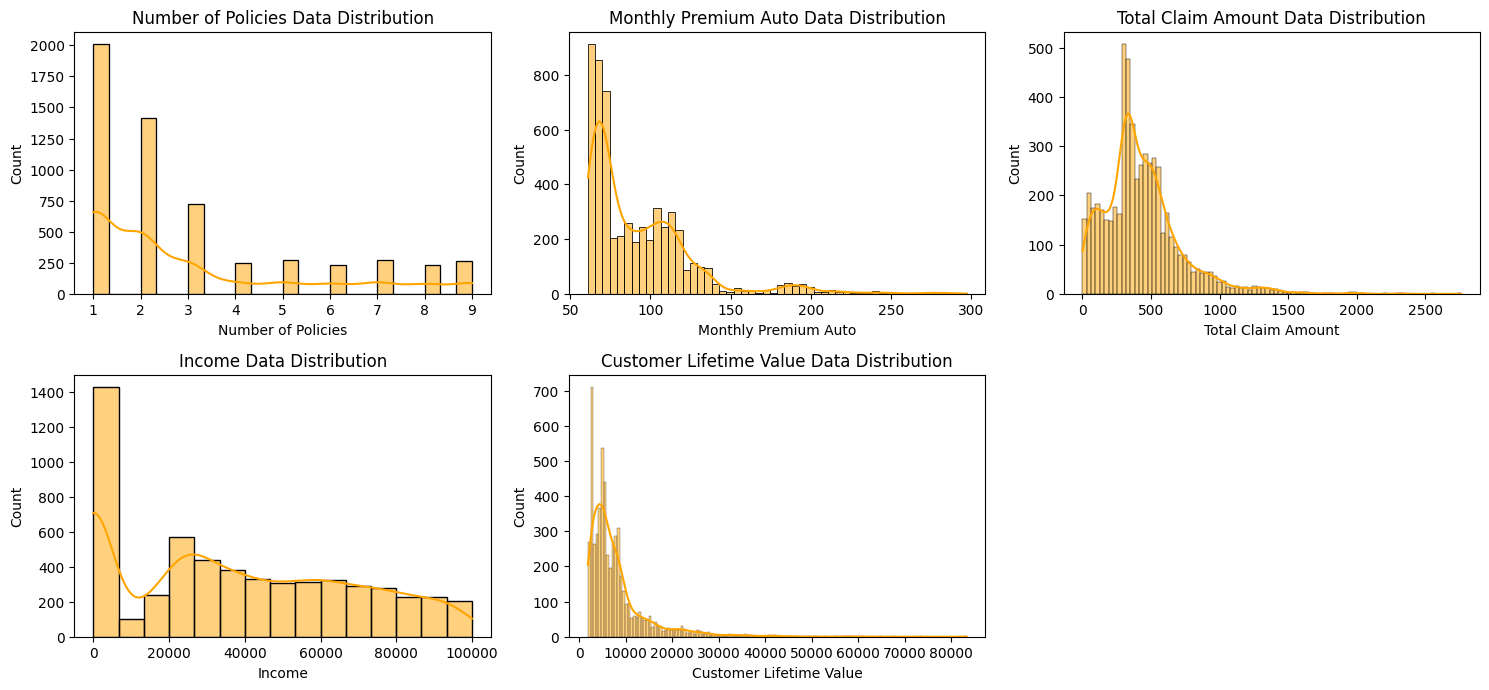

In [ ]:
# Data Distribution Visualization
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f'{col} Data Distribution')
    plt.tight_layout()

plt.show()

In [ ]:
# check the customers having no jobs and but have incomes
# to make sure no error data input
no_job_with_income_filter = (df['EmploymentStatus']=="Unemployed") & (df['Income']!=0)
df[no_job_with_income_filter].head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value


In [ ]:
# Filter the DataFrame for 'Unemployed' and 'Employed'
filtered_df = df[df['EmploymentStatus'].isin(['Unemployed', 'Employed'])]

# Group by EmploymentStatus and calculate summary statistics for Income
grouped = filtered_df.groupby('EmploymentStatus')['Income'].describe()

print(grouped)

                   count          mean           std      min      25%  \
EmploymentStatus                                                         
Employed          3541.0  56665.612539  22088.979959  20009.0  37384.0   
Unemployed        1429.0      0.000000      0.000000      0.0      0.0   

                      50%      75%      max  
EmploymentStatus                             
Employed          55645.0  74454.0  99934.0  
Unemployed            0.0      0.0      0.0  


In [ ]:
# Define the function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Sample DataFrame
# df = pd.DataFrame({'Customer Lifetime Value': [values]})

# Detect outliers
outliers_iqr = detect_outliers_iqr(df, 'Customer Lifetime Value')

# Display outliers
print("Outliers detected using IQR method:")
print(outliers_iqr)

Outliers detected using IQR method:
      Vehicle Class  Coverage Renew Offer Type EmploymentStatus  \
11    Four-Door Car     Basic           Offer1         Employed   
31              SUV     Basic           Offer1         Employed   
37    Four-Door Car     Basic           Offer2         Employed   
38    Four-Door Car     Basic           Offer3         Employed   
46    Four-Door Car  Extended           Offer2         Employed   
...             ...       ...              ...              ...   
5594            SUV     Basic           Offer2         Employed   
5606  Four-Door Car  Extended           Offer2         Employed   
5643            SUV  Extended           Offer1       Unemployed   
5662     Luxury Car   Premium           Offer2         Employed   
5667     Luxury SUV  Extended           Offer2         Employed   

     Marital Status             Education  Number of Policies  \
11           Single              Bachelor                   2   
31          Married          

If we use the IQR method to remove outliers, we would need to remove 449 data points, which is nearly 10% of the dataset. Therefore, we will explore other methods for outlier removal. First, we will conduct a normality test.

In [ ]:
# Shapiro-Wilk Test
shapiro_test = stats.shapiro(df['Customer Lifetime Value'])
statistic = shapiro_test.statistic
p_value = shapiro_test.pvalue

print("Shapiro-Wilk Test:")
print(f"Statistic: {statistic}, p-value: {p_value}")

# Conclusion
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Conclusion: The data significantly deviates from a normal distribution (p-value < 0.05). The data is not normally distributed.")
else:
    print("Conclusion: There is not enough evidence to suggest that the data deviates from a normal distribution (p-value >= 0.05). The data could be normally distributed.")

Shapiro-Wilk Test:
Statistic: 0.7043538606366798, p-value: 5.427409664584555e-72
Conclusion: The data significantly deviates from a normal distribution (p-value < 0.05). The data is not normally distributed.


Other than Boxplot / IQR method, we can remove outliers using these methods:
- Z-Score Method
Pros: Useful for data with a normal distribution. Provides a clear threshold (e.g., |z| > 3) for identifying outliers.
Cons: Sensitive to non-normal distributions. Assumes data is normally distributed, which may not always be the case.
- Percentile Method
Pros: Simple and straightforward. Good for identifying outliers based on specific percentiles, which can be useful if you expect outliers to be extreme values.
Cons: May not be as robust if the distribution of data is very skewed or has a large number of outliers.

Since the data is not normal, use the Percentile Method.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   int64  
 7   Monthly Premium Auto     5669 non-null   int64  
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   int64  
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 487.3+ KB


In [ ]:
# Calculate percentiles
lower_percentile = df['Customer Lifetime Value'].quantile(0.01)
upper_percentile = df['Customer Lifetime Value'].quantile(0.99)

# Identify outliers
outliers_percentile = df[(df['Customer Lifetime Value'] < lower_percentile) | (df['Customer Lifetime Value'] > upper_percentile)]

print("Outliers using Percentile Method:")
print(outliers_percentile)


Outliers using Percentile Method:
      Vehicle Class  Coverage Renew Offer Type EmploymentStatus  \
76       Sports Car   Premium           Offer3         Employed   
114             SUV   Premium           Offer2         Employed   
153   Four-Door Car     Basic           Offer4       Unemployed   
199      Luxury Car  Extended           Offer2         Employed   
235      Luxury SUV   Premium           Offer4         Employed   
...             ...       ...              ...              ...   
5385            SUV  Extended           Offer1       Unemployed   
5391  Four-Door Car     Basic           Offer2       Unemployed   
5415     Sports Car  Extended           Offer4         Employed   
5546   Two-Door Car     Basic           Offer4       Unemployed   
5594            SUV     Basic           Offer2         Employed   

     Marital Status             Education  Number of Policies  \
76           Single  High School or Below                   2   
114         Married            

In [ ]:
# Remove outliers
df_cleaned = df[(df['Customer Lifetime Value'] >= lower_percentile) & (df['Customer Lifetime Value'] <= upper_percentile)]

print("\nCleaned Data (after removing outliers):")
df_cleaned.info()


Cleaned Data (after removing outliers):
<class 'pandas.core.frame.DataFrame'>
Index: 5555 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5555 non-null   object 
 1   Coverage                 5555 non-null   object 
 2   Renew Offer Type         5555 non-null   object 
 3   EmploymentStatus         5555 non-null   object 
 4   Marital Status           5555 non-null   object 
 5   Education                5555 non-null   object 
 6   Number of Policies       5555 non-null   int64  
 7   Monthly Premium Auto     5555 non-null   int64  
 8   Total Claim Amount       5555 non-null   float64
 9   Income                   5555 non-null   int64  
 10  Customer Lifetime Value  5555 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 520.8+ KB


####Duplicates

df.duplicated().sum() is used to count the duplicate rows in a DataFrame (df). It returns the total number of rows that are exact duplicates of other rows in the DataFrame. This method is useful for identifying and potentially removing duplicate data entries, ensuring data integrity and accuracy in analysis or modeling processes.

In [ ]:
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df_cleaned.drop_duplicates(inplace=True)

Number of duplicate rows: 606


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4949 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4949 non-null   object 
 1   Coverage                 4949 non-null   object 
 2   Renew Offer Type         4949 non-null   object 
 3   EmploymentStatus         4949 non-null   object 
 4   Marital Status           4949 non-null   object 
 5   Education                4949 non-null   object 
 6   Number of Policies       4949 non-null   int64  
 7   Monthly Premium Auto     4949 non-null   int64  
 8   Total Claim Amount       4949 non-null   float64
 9   Income                   4949 non-null   int64  
 10  Customer Lifetime Value  4949 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 464.0+ KB


####Data Formatting

If we look at the data info, all the data format is already correct.

###Statistics

In [ ]:
display(df_cleaned.describe(), df_cleaned.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000
mean,3.022429,92.491008,426.896023,38053.606789,7709.885078
std,2.400422,33.533905,290.735372,30637.980737,5719.422973
min,1.000000,61.000000,0.423310,0.000000,2239.647297
25%,1.000000,69.000000,249.085887,0.000000,4019.384424
50%,2.000000,82.000000,374.400000,34835.000000,5827.483965
75%,4.000000,108.000000,547.200000,62739.000000,8923.154803
max,9.000000,297.000000,2759.794354,99934.000000,36057.537020


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,4949,4949,4949,4949,4949,4949
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2533,3032,1973,3147,2938,1503


Using descriptive statistics, we gain insights:
- Numerical data:

providing count, mean, standard deviation, etc.
- Categorical data:

The term "top" is equivalent to the mode of the data, describing the most common customer type. Below is the description of the customer:
Four-Door Car with coverage type Basic,  Offer 1, employed married with bachelor's degree customers.

Calculate the number of customers based on category for each variable in the dataset.

In [ ]:
variables = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education',
             'Number of Policies']

for var in variables:
    print("Number of customers based on category for variable '{}':".format(var))
    print(df_cleaned[var].value_counts())
    print("\n")

Number of customers based on category for variable 'Vehicle Class':
Vehicle Class
Four-Door Car    2533
Two-Door Car     1039
SUV               940
Sports Car        254
Luxury Car         95
Luxury SUV         88
Name: count, dtype: int64


Number of customers based on category for variable 'Coverage':
Coverage
Basic       3032
Extended    1494
Premium      423
Name: count, dtype: int64


Number of customers based on category for variable 'Renew Offer Type':
Renew Offer Type
Offer1    1973
Offer2    1475
Offer3     872
Offer4     629
Name: count, dtype: int64


Number of customers based on category for variable 'EmploymentStatus':
EmploymentStatus
Employed         3147
Unemployed       1275
Medical Leave     229
Disabled          215
Retired            83
Name: count, dtype: int64


Number of customers based on category for variable 'Marital Status':
Marital Status
Married     2938
Single      1326
Divorced     685
Name: count, dtype: int64


Number of customers based on category for 

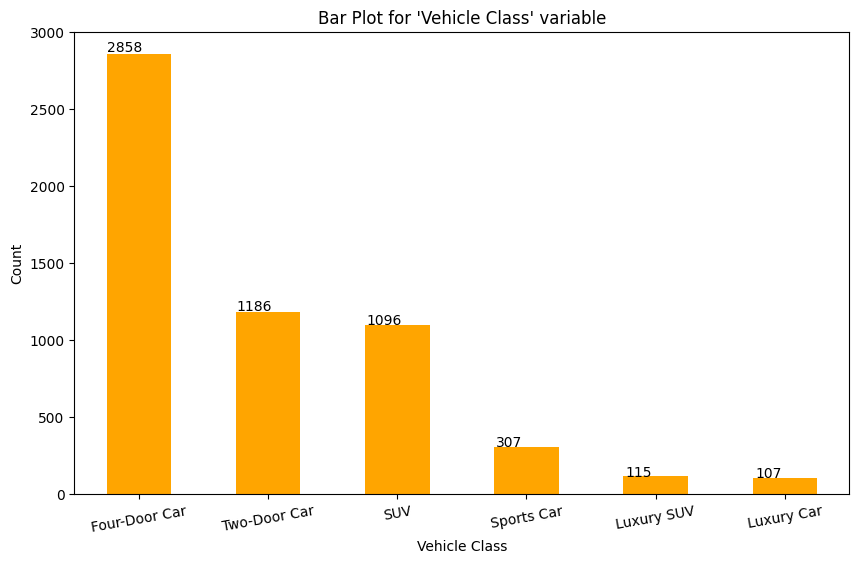

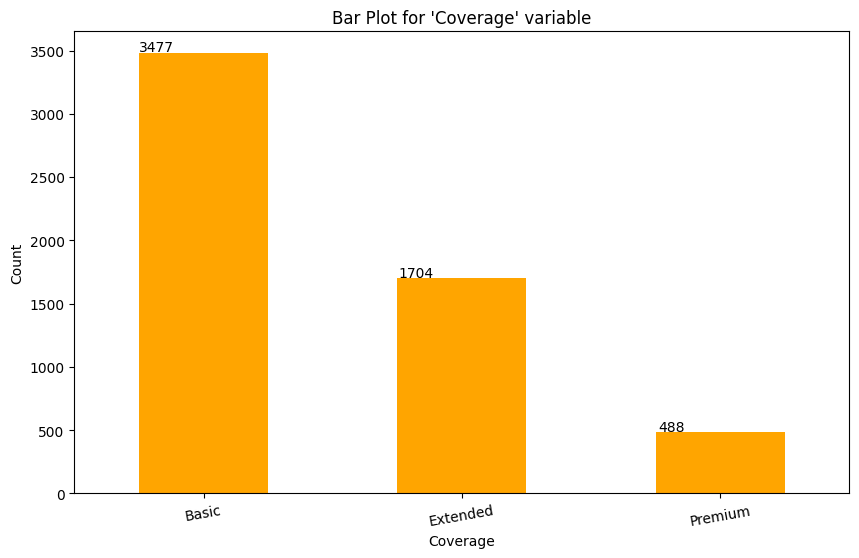

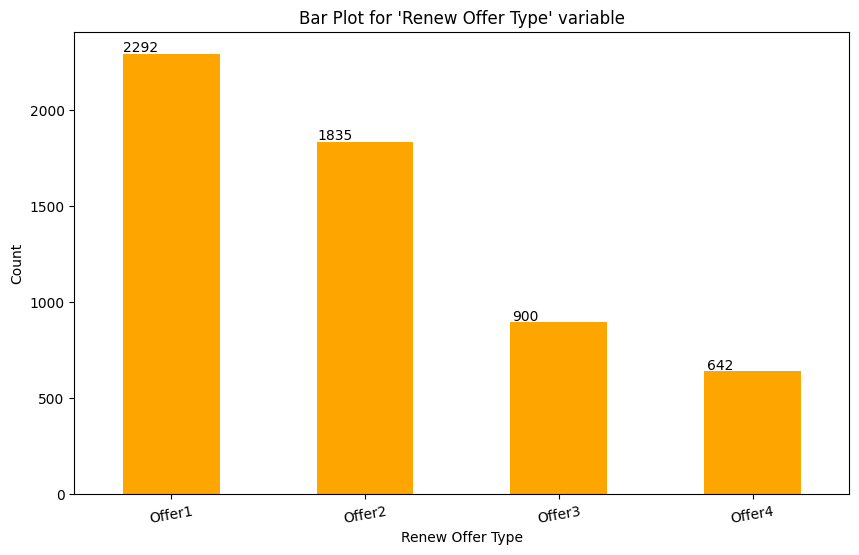

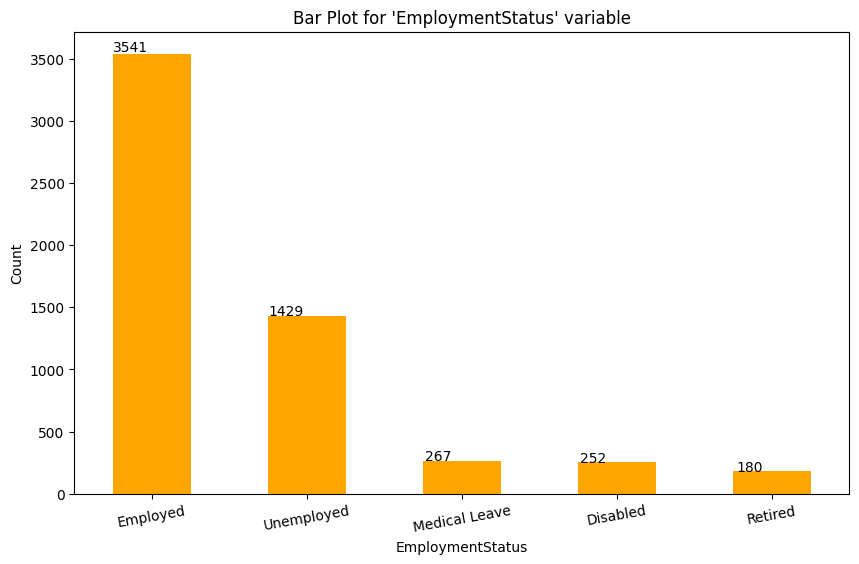

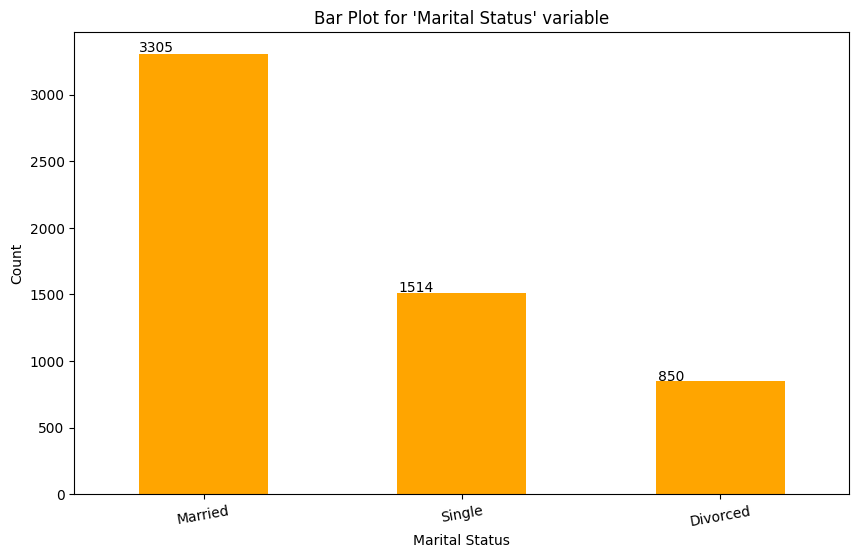

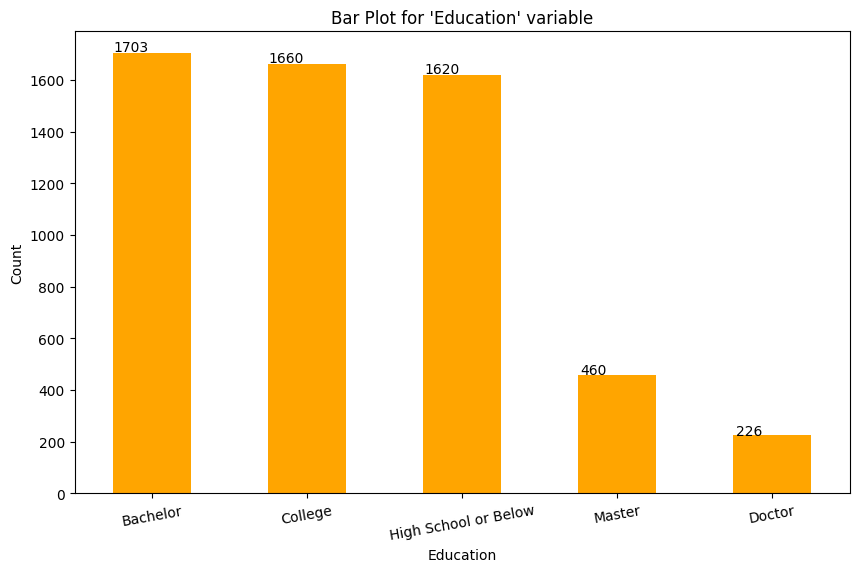

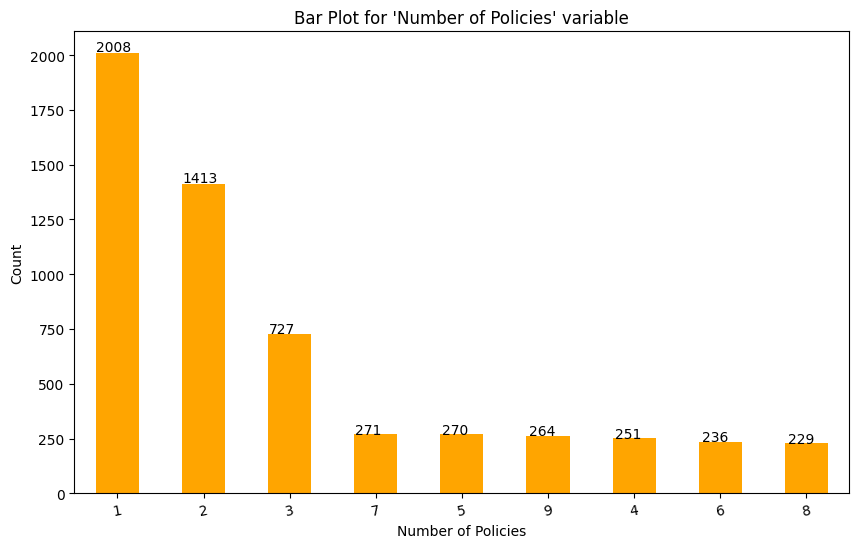

In [ ]:
# List of variables to show bar plots
variables = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education',
             'Number of Policies']

# Setting the color to orange
color = 'orange'

# Plotting bar plots with data labels in orange for each variable
for var in variables:
    plt.figure(figsize=(10, 6))
    value_counts = df[var].value_counts()
    ax = value_counts.plot(kind='bar', color=color)  # Set the color to orange
    plt.title("Bar Plot for '{}' variable".format(var))
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=10)

    # Adding data labels to the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.show()


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4949 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4949 non-null   object 
 1   Coverage                 4949 non-null   object 
 2   Renew Offer Type         4949 non-null   object 
 3   EmploymentStatus         4949 non-null   object 
 4   Marital Status           4949 non-null   object 
 5   Education                4949 non-null   object 
 6   Number of Policies       4949 non-null   int64  
 7   Monthly Premium Auto     4949 non-null   int64  
 8   Total Claim Amount       4949 non-null   float64
 9   Income                   4949 non-null   int64  
 10  Customer Lifetime Value  4949 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 464.0+ KB


- Majority own 4-door vehicles (2565 customers), with 2-door and SUVs following.
- Basic coverage is popular (3100 customers), followed by extended and premium.
- Renewal Offer 1 is top (2019 customers), then 2, 3, and 4.
- Most customers are employed (3187), married (2986).
- Education levels show Bachelor's, College, and High School are similar, Masters and Doctorate lower.
- Customers mostly have one policy (1763), then two and three. Over 3 policies have around 200+ customers.

####<b>Conclusion for Feature Engineering Task</b>:

A. Handling and encoding methods for categorical data:
1. Vehicle class: keep as it is then do one hot encoding because we cannot define the order of the vehicle type.
2. Coverage: ordinal encoding (basic lowest, premium highest) since they are connected by the level of the service.
3. Renew offer type: check first the data definition (can be ordinal).
4. Employment status: keep as it is then do one hot encoding (hard to group).
5. Marital status: keep as it is then do one hot encoding (only 3 categories).
6. Education: redefine High School or Less and College as Undergraduate or Less. redefine Master and Doctor as Postgraduate.
You'll get three categories: Undergraduate or Less, Bachelor, Postgraduate. Do ordinal encoding because educational level order exists (Undergraduate or Less < Bachelor < Postgraduate).

B. For Feature Engineering:
1. We need to ensure the features are not correlated with one another. So, we will make a <u>correlation matrix</u> for categorical and numerical data separately.



#Data Modelling

## **Feature Engineering**

To prepare data for training the model, we need to perform feature engineering. The process involves the steps as below:
1. Feature creation and selection.

  i. Handling cardinality (convert previous categories into new ones with less categories).

  ii. Then, check correlation for both numerical and categorical features to ensure no multicollinearity for regression.
2. Feature transformation (make pipeline for encoding and scaling)

  i. Encoding categorical features with <u>One-Hot Encoding </u> and <u>Ordinal encoding</u>.
  
  ii. Feature scaling for all features used. We will choose <u>RobustScaler</u> since we have significant number of outlier data.

### **Feature Creation and Selection**

#####<b>Conclusion for Feature Engineering Task</b>:

A. Handling and encoding methods for categorical data:
1. Vehicle class: keep as it is then do one hot encoding because we cannot define the order of the vehicle type.
2. Coverage: ordinal encoding (basic lowest, premium highest) since they are connected by the level of the service.
3. Renew offer type: assume the data is categorical not ordinal so use one hot encoding
4. Employment status: keep as it is then do one hot encoding (hard to group).
5. Marital status: keep as it is then do one hot encoding (only 3 categories).
6. Education: redefine High School or Less and College as Undergraduate or Less. redefine Master and Doctor as Postgraduate.
You'll get three categories: Undergraduate or Less, Bachelor, Postgraduate. Do ordinal encoding because educational level order exists (Undergraduate or Less < Bachelor < Postgraduate).




In [ ]:
unique_education_values = df_cleaned['Education'].unique()
print("Unique values in 'Education' column:")
print(unique_education_values)

Unique values in 'Education' column:
['High School or Below' 'College' 'Master' 'Bachelor' 'Doctor']


In [ ]:
# change number of categories in education
df_cleaned['Education'] = np.where(df_cleaned['Education'].isin(['High School or Below', 'College']), 'Undergraduate or Less', df_cleaned['Education'])
# df_cleaned['Education'] = df_cleaned['Education'].isin('Master', 'Doctor').apply(lambda x: 'Postgraduate')
df_cleaned['Education'] = np.where(df_cleaned['Education'].isin(['Master', 'Doctor']), 'Postgraduate', df_cleaned['Education'])


In [ ]:
# show result of new grouping
df_cleaned.Education.value_counts()

Education
Undergraduate or Less    2856
Bachelor                 1503
Postgraduate              590
Name: count, dtype: int64

####<b>Result for handling cardinality</b>:
1. Education's category is reduced from 5 to 3 successfully.

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4949 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4949 non-null   object 
 1   Coverage                 4949 non-null   object 
 2   Renew Offer Type         4949 non-null   object 
 3   EmploymentStatus         4949 non-null   object 
 4   Marital Status           4949 non-null   object 
 5   Education                4949 non-null   object 
 6   Number of Policies       4949 non-null   int64  
 7   Monthly Premium Auto     4949 non-null   int64  
 8   Total Claim Amount       4949 non-null   float64
 9   Income                   4949 non-null   int64  
 10  Customer Lifetime Value  4949 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 464.0+ KB


#### <b>Correlation Matrix and Chi-Squared Test</b>
- General checking of any relationship between features: Phi-K Correlation Matrix
- Statistical study to prove significant relationship among correlated features: Chi-Squared Test

##### 1.Phi-K Correlation Matrix
- It is suitable for checking any correlation among the features in mixed data type (categorical and numerical).
- It can capture redundant features for feature selection purposes.
- Features with highest correlation to the target variable are regarded as important features for modelling.

interval columns not set, guessing: ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']


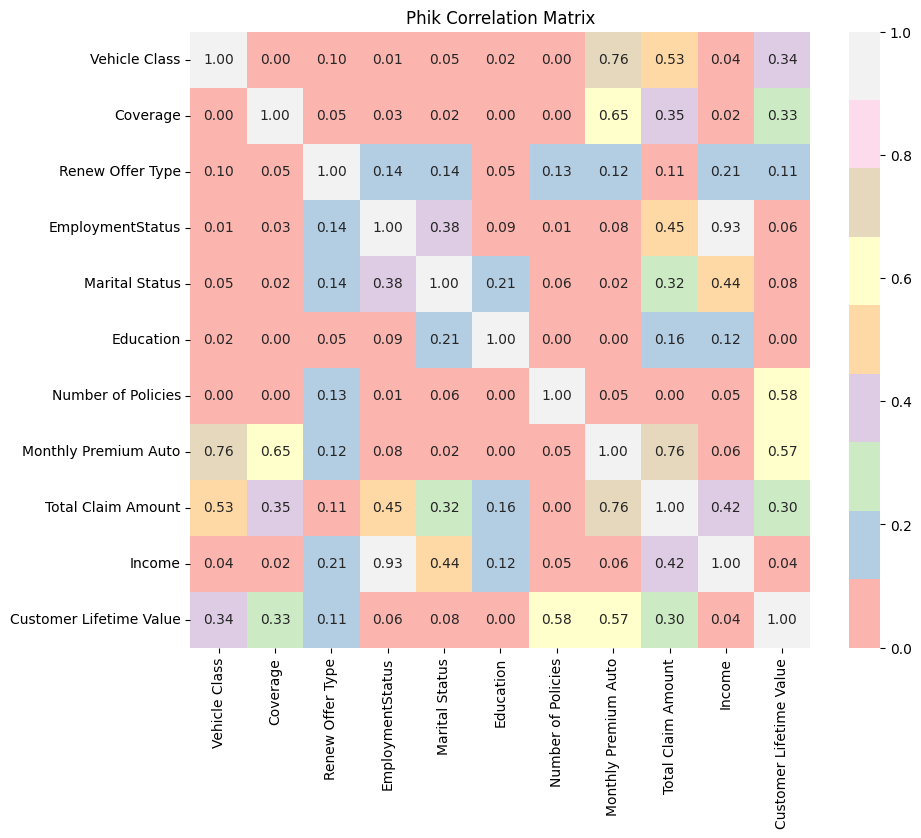

In [ ]:
# Phik matrix
phik_data = df_cleaned
phik_corr = phik_matrix(phik_data)

# plot
plt.figure(figsize=(10,8))
sns.heatmap(phik_corr, annot=True,cmap='Pastel1',fmt='.2f')
plt.title('Phik Correlation Matrix')
plt.show()

#####<b>Conclusion for Phi-K Correlation for Features with CLV</b>:
1. Top 5 Features Correlated with CLV:  
 Number of Policies has the highest correlation with CLV (0.58), followed by Monthly Premium Auto (0.57) Vehicle Class (0.34), Coverage (0.33), and Total Claim Amount (0.30).

2. Columns to exclude from model training:  
 a. <u>Total Claim Amount</u> has too many correlation with other features, so needs to be dropped.  
 b. The feature <u>EmploymentStatus</u> is replaceable by Income since they mean the same anyway (capability of earning). Income is more meaningful since it gives out numbers.  
 c. <u>Renew Offer Type</u> has many weak correlation with other features but irrelevant to CLV, so can be dropped.

##### 2.Chi-Squared Test
- The aim is to test statistical significance between categorical features.
- Among the categorical features:  
  a. Marital Status.  
  b. Employment Status.   
  c. Renew Offer Type.  
  d. Education.  
are correlated the most with other features.

We need to confirm if the relationship is random or statistically significant.

`H0`: If the features are related randomly.  
`H1`: If the features have a statistically significant relationship (dependency).  
where p < 0.05 indicates <u>rejection of H0</u>


In [ ]:
import pandas as pd

In [ ]:
# prepare contingency table
cont_marital_offer  = pd.crosstab(df_cleaned['Marital Status'], df_cleaned['Renew Offer Type'])
cont_employment_offer  = pd.crosstab(df_cleaned['EmploymentStatus'], df_cleaned['Renew Offer Type'])
cont_marital_employment  = pd.crosstab(df_cleaned['Marital Status'], df_cleaned['EmploymentStatus'])
cont_marital_edu = pd.crosstab(df_cleaned['Marital Status'], df_cleaned['Education'])

In [ ]:
def chi2_test_result(cont_table,col1,col2):
    chi2, p, dof, expected = chi2_contingency(cont_table)
    # Interpret results
    print(f"Chi-square test for {col1} and {col2}")
    print(f'Chi-square statistic: {chi2:.3f}')
    print(f'p-value: {p:.3f}')
    print(f'Degrees of freedom: {dof}')
    print(f'Expected frequencies:{expected}')

In [ ]:
# show chi results for each categorical column
chi2_test_result(cont_marital_offer,'Marital Status','Renew Offer Type')

Chi-square test for Marital Status and Renew Offer Type
Chi-square statistic: 172.769
p-value: 0.000
Degrees of freedom: 6
Expected frequencies:[[ 273.08648212  204.15740554  120.69508992   87.06102243]
 [1171.28187513  875.64154375  517.66740756  373.40917357]
 [ 528.63164276  395.20105072  233.63750253  168.529804  ]]


In [ ]:
# show chi results for each categorical column
chi2_test_result(cont_employment_offer,'EmploymentStatus','Renew Offer Type')

Chi-square test for EmploymentStatus and Renew Offer Type
Chi-square statistic: 203.349
p-value: 0.000
Degrees of freedom: 12
Expected frequencies:[[  85.71327541   64.07860174   37.88240048   27.32572237]
 [1254.60315215  937.93190544  554.49262477  399.97231764]
 [  91.29460497   68.25116185   40.34916145   29.10507173]
 [  33.08931097   24.73732067   14.62436856   10.5489998 ]
 [ 508.2996565   380.00101031  224.65144474  162.04788846]]


In [ ]:
# show chi results for each categorical column
chi2_test_result(cont_marital_employment,'Marital Status','EmploymentStatus')

Chi-square test for Marital Status and EmploymentStatus
Chi-square statistic: 943.617
p-value: 0.000
Degrees of freedom: 8
Expected frequencies:[[  29.75853708  435.58193574   31.69630228   11.48817943  176.47504546]
 [ 127.63588604 1868.23317842  135.94706001   49.27338856  756.91048697]
 [  57.60557688  843.18488584   61.3566377    22.23843201  341.61446757]]


In [ ]:
# show chi results for each categorical column
chi2_test_result(cont_marital_edu,'Marital Status','Education')

Chi-square test for Marital Status and Education
Chi-square statistic: 46.684
p-value: 0.000
Degrees of freedom: 4
Expected frequencies:[[ 208.03293595   81.66296221  395.30410184]
 [ 892.2638917   350.2566175  1695.47949081]
 [ 402.70317236  158.08042029  765.21640736]]


#####<b>Conclusion for Chi-Squared Test</b>:
1. Based on the chi-squared test, it is found that Marital Status is dependent to Renew Offer Type, EmploymentStatus, and Education due to p-value = 0.
2. Next, Renew Offer Type is also dependent to EmploymentStatus due to p-value = 0.
3. However, Marital Status and Education are considered important in our study so we will keep them.
4. While EmploymentStatus and Renew Offer Type will be removed due to low feature importance to CLV and too many correlation as well as dependency to other features.

In [ ]:
# drop columns with low correlation coefficients
df_cleaned.drop(columns=["Total Claim Amount","EmploymentStatus","Renew Offer Type"],axis = 1, inplace = True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4949 entries, 0 to 5668
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4949 non-null   object 
 1   Coverage                 4949 non-null   object 
 2   Marital Status           4949 non-null   object 
 3   Education                4949 non-null   object 
 4   Number of Policies       4949 non-null   int64  
 5   Monthly Premium Auto     4949 non-null   int64  
 6   Income                   4949 non-null   int64  
 7   Customer Lifetime Value  4949 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 348.0+ KB


### Data Splitting Process

In [ ]:
# Separate target and feature
x = df_cleaned.drop("Customer Lifetime Value", axis = 1) # Feature
y = df_cleaned["Customer Lifetime Value"]                # Target : Customer Lifetime Value

In [ ]:
# split target and features
test_size = 0.30  # or any other value appropriate for your dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=10)

#####<b>Data Splitting Result</b>:
1. Data is split 70/30 for train and test sets.

### **Feature Transformation (Encoding) and Scaling**


In [ ]:
# check data type
x.dtypes

Vehicle Class           object
Coverage                object
Marital Status          object
Education               object
Number of Policies       int64
Monthly Premium Auto     int64
Income                   int64
dtype: object

In [ ]:
# show column names for numeric data
numeric_data = list(x.select_dtypes(include=['float64', 'int64']).columns)
numeric_data

['Number of Policies', 'Monthly Premium Auto', 'Income']

In [ ]:
# show column names for categorical data
categorical_data = list(x.select_dtypes(include=['object']).columns)
categorical_data

['Vehicle Class', 'Coverage', 'Marital Status', 'Education']

In [ ]:
# check dimension of x_train
x_train.shape

(3464, 7)

In [ ]:
# check dimension of x_test
x_test.shape

(1485, 7)

In [ ]:
# split x based on data type for different processings
numeric_data = list(x.select_dtypes(include=['float64', 'int64']).columns)
cat_one_hot = ['Vehicle Class','Marital Status']
cat_ordinal = ['Coverage','Education']

# set pipelines for different data preprocessing methods
num_pipe = Pipeline([('scaler', RobustScaler())])
cat_pipe_one_hot = Pipeline([('one_hot_encoder', OneHotEncoder(drop='first'))])
cat_pipe_ordinal = Pipeline([('ordinal_encoder', OrdinalEncoder())])

# column transformer flow
preprocessor = ColumnTransformer(
  transformers=[
      ('num', num_pipe, numeric_data),
      ('cat_one_hot', cat_pipe_one_hot, cat_one_hot),
      ('cat_ordinal', cat_pipe_ordinal, cat_ordinal)
  ])

# transform x_train and x_test based on fitting on x_train
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

In [ ]:
x_train_transformed

array([[ 0.66666667,  2.725     , -0.19237798, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33333333,  0.625     , -0.17070048, ...,  0.        ,
         2.        ,  0.        ],
       [-0.33333333,  0.025     ,  0.18308536, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.33333333,  2.875     ,  0.72960598, ...,  0.        ,
         2.        ,  2.        ],
       [-0.33333333,  0.425     ,  0.7789235 , ...,  0.        ,
         1.        ,  2.        ],
       [ 0.        , -0.125     , -0.55675678, ...,  1.        ,
         1.        ,  2.        ]])

In [ ]:
# show number of columns after encoding
x_train_trans_result = pd.DataFrame(x_train_transformed)
x_train_trans_result.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.666667,2.725,-0.192378,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.333333,0.625,-0.170700,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
2,-0.333333,0.025,0.183085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.333333,-0.450,0.473948,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.333333,-0.200,0.517810,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [ ]:
# show number of columns after encoding
x_test_trans_result = pd.DataFrame(x_test_transformed)
x_test_trans_result.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,-0.375,0.020607,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,1.666667,0.375,0.018038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
2,-0.333333,-0.225,0.676150,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
3,0.000000,0.775,0.765651,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
4,2.000000,1.075,-0.556757,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


#####<b>Conclusion for Data Preprocessing Results</b>:
1. There are 11 columns created after feature scaling on numerical data and encoding (one-hot and ordinal) on categorical data.

### **Model Training**

#### **Model training with different ML algorithms**
- use transformed target regressor for each basic model to enhance performance. This transformation is useful since it considers non-linear relationship between features and target variable.
- initial stage: set no parameter for each model

##### Linear Regression

In [ ]:
# call linear regression
linreg_model = LinearRegression()
# convert target variable to natural logarithmic scale before fitting, then inverse after fitting
log_linreg = TransformedTargetRegressor(linreg_model, func=np.log, inverse_func=np.exp)
# fit to train set
log_linreg.fit(x_train_transformed, y_train)
# make prediction
y_predict_linreg = log_linreg.predict(x_test_transformed)

##### Lasso Regression

In [ ]:
# call lasso regression
lasso_model = Lasso(alpha=0.1)
# convert target variable to natural logarithmic scale before fitting, then inverse after fitting
log_lasso = TransformedTargetRegressor(lasso_model, func=np.log, inverse_func=np.exp)
# fit to train set
log_lasso.fit(x_train_transformed, y_train)
# make prediction
y_predict_lasso = log_lasso.predict(x_test_transformed)

##### Ridge Regression

In [ ]:
# call ridge regressor
ridge_model = Ridge(alpha = 0.1)
# convert target variable to natural logarithmic scale before fitting, then inverse after fitting
log_ridge = TransformedTargetRegressor(ridge_model, func=np.log, inverse_func=np.exp)
# fit to train set
log_ridge.fit(x_train_transformed, y_train)
# make prediction
y_predict_ridge = log_ridge.predict(x_test_transformed)

##### KNN Regressor

In [ ]:
# call KNN regressor
knn_model = KNeighborsRegressor()
# convert target variable to natural logarithmic scale before fitting, then inverse after fitting
log_knn = TransformedTargetRegressor(knn_model, func=np.log, inverse_func=np.exp)
# fit to train set
log_knn.fit(x_train_transformed, y_train)
# make prediction
y_predict_knn = log_knn.predict(x_test_transformed)

##### Decision Tree Regressor

In [ ]:
# call DT Regressor
dt_model = DecisionTreeRegressor()
# convert target variable to natural logarithmic scale before fitting, then inverse after fitting
log_dt = TransformedTargetRegressor(dt_model, func=np.log, inverse_func=np.exp)
# fit to train set
log_dt.fit(x_train_transformed, y_train)
# make prediction
y_predict_dt = log_dt.predict(x_test_transformed)

##### SVR Regressor

In [ ]:
# Create an SVR model
svr_model = SVR(kernel='poly')
# convert target variable to natural logarithmic scale before fitting, then inverse after fitting
log_svr = TransformedTargetRegressor(svr_model, func=np.log, inverse_func=np.exp)
# You can change the kernel to 'poly', 'rbf', or 'sigmoid'
# Fit the model to the training data
log_svr.fit(x_train_transformed, y_train)
# make prediction
y_predict_svr = log_svr.predict(x_test_transformed)

##### Actual VS Predicted Results

In [ ]:
# create dataframe for summarizing the results
df_test_results = pd.DataFrame({'actual': y_test, 'predicted_linreg': y_predict_linreg,
                                'predicted_lasso': y_predict_lasso,
                                'predicted_ridge': y_predict_ridge,
                                'predicted_knn': y_predict_knn,
                                'predicted_dt': y_predict_dt,
                                'predicted_svr': y_predict_svr})
df_test_results.head()

,actual,predicted_linreg,predicted_lasso,predicted_ridge,predicted_knn,predicted_dt,predicted_svr
1981,7854.771821,4636.636362,5558.395698,4636.846783,10929.357874,13265.962560,4186.621260
5079,7613.193095,7925.552187,6403.646411,7927.690221,7236.377720,7761.267839,7939.988345
1455,2885.002508,4783.359392,5692.156288,4784.324812,2816.405684,2918.576189,3143.803660
5283,13464.602890,7567.030341,6786.888264,7567.443849,14554.759174,12375.021630,7517.880679
4412,8401.788653,11417.670791,7247.668068,11413.609237,8647.655375,8510.525936,7967.545720


### **Model Evaluation**

#### **Select and Apply Evaluation Metrics**

 1. The Mean Absolute Percentage Error (MAPE) is a good evaluation metric due to better interpretability and focus on relative errors than MSE. It's less sensitive to outliers.
 2. The R2-score shows how well the features explain variation of the target variable.

In [ ]:
# function to show metric results for each ML algorithm
def show_metric_result(model_name,df):
    column_name = 'predicted_' + model_name
    print(f"{model_name.upper()} MODEL EVALUATION RESULT")
    print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(df['actual'],df[column_name]):.3f}")
    # print(f"Mean Square Error: {mean_squared_error(df['actual'],df[column_name]):.3f}")
    print(f"Root Mean Square Error: {mean_squared_error(df['actual'],df[column_name],squared=False):.3f}")
    print(f"R2-score: {r2_score(df['actual'],df[column_name]):.3f}")


##### Linear Regression Result

In [ ]:
# show result for linear regression
show_metric_result('linreg',df_test_results)

LINREG MODEL EVALUATION RESULT
Mean Absolute Percentage Error: 0.404
Root Mean Square Error: 5337.792
R2-score: 0.083


##### Lasso Regression Result

In [ ]:
# show result for linear regression
show_metric_result('lasso',df_test_results)

LASSO MODEL EVALUATION RESULT
Mean Absolute Percentage Error: 0.465
Root Mean Square Error: 5444.032
R2-score: 0.046


##### Ridge Regression Result

In [ ]:
# show result for linear regression
show_metric_result('ridge',df_test_results)

RIDGE MODEL EVALUATION RESULT
Mean Absolute Percentage Error: 0.404
Root Mean Square Error: 5337.833
R2-score: 0.083


##### KNN Regression Result

In [ ]:
# KNN result
show_metric_result('knn',df_test_results)

KNN MODEL EVALUATION RESULT
Mean Absolute Percentage Error: 0.211
Root Mean Square Error: 4369.975
R2-score: 0.386


##### Decision Tree Regression Result

In [ ]:
# decision tree regressor result
show_metric_result('dt',df_test_results)

DT MODEL EVALUATION RESULT
Mean Absolute Percentage Error: 0.134
Root Mean Square Error: 4152.788
R2-score: 0.445


##### SVR Regression Result

In [ ]:
# svr regressor result
show_metric_result('svr',df_test_results)

SVR MODEL EVALUATION RESULT
Mean Absolute Percentage Error: 0.246
Root Mean Square Error: 5408.952
R2-score: 0.059


####<b>Conclusion for Model Evaluation Result</b>:
1. Based on MAPE result, decision tree regressor (DT model) performs best since it has the lowest MAPE (0.128). The second best is KNN (0.211), followed by SVR (0.246), and linear models [Linear, Lasso, Ridge (about 0.4)].
2. Similarly, highest R2-score is also achieved by DT model (0.467), followed by KNN (0.386), linear models [Linear, Lasso, Ridge (0.083)], and SVR (0.059).
3. So, we will choose decision tree for hyperparameter tuning to improve the model performance.

# **Hyperparameter Tuning on Decision Tree Model**

`Method`: Random Search CV.  
`Reason`: Lower computational cost than Grid Search CV so it's faster to show the result.

In [ ]:
# define parameters for the decision tree model
param_dist = {
    'regressor__max_depth': [3, None],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__min_samples_split': randint(2, 20),
    'regressor__min_samples_leaf': randint(1, 10)
}

In [ ]:
# conduct random search
random_search_dt = RandomizedSearchCV(estimator=log_dt, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=10, n_jobs=-1)
random_search_dt.fit(x_train_transformed, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=TransformedTargetRegressor(func=<ufunc 'log'>,
                                                        inverse_func=<ufunc 'exp'>,
                                                        regressor=DecisionTreeRegressor()),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'regressor__max_depth': [3, None],
                                        'regressor__max_features': ['auto',
                                                                    'sqrt',
                                                                    'log2'],
                                        'regressor__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdb760cb490>,
                                        'regressor__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdb760cb610>},
                   random_state=10, verbose=2)

In [ ]:
# Print best parameters and score
print(random_search_dt.best_params_)

{'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 8, 'regressor__min_samples_split': 2}


#### **Model Training with the best parameters**

1. According to Random Search CV method, the best parameters for Decision Tree Regressor are:

  a. **'max_depth': None**.   
   The tree should divide until minimum samples split < 13.  
  b. **'max_features': 'sqrt'**.  
   The number of features required to split is based on square root of total number of features.  
   For example, if you have 64 features, then each split requires sqrt(64) = 8 features.  
  c. **'min_samples_leaf': 8**.  
   This is to set minimum number of samples in a leaf node. If number of samples < 2, then the leaf is the terminal (final) node.  
  d. **'min_samples_split': 2**.    
   This is to set minimum number of samples to split to form a new node. If the samples < 2, no splitting will occur.  

2. Note for (c) and (d), suppose you have sample = 23,  
   if you proceed splitting to form:  
    a. leaf A = 1 samples.  
    b. leaf B= 22 samples.  
  the splitting will not occur because it violates (c).
   

In [ ]:
# Fit the model to the entire training set
random_search_dt.fit(x_train_transformed, y_train)

# Make predictions on the test set
y_pred_best_dt = random_search_dt.predict(x_test_transformed)

# add to the dataframe to compare actual and predicted results
df_test_results['predicted_random_dt'] = y_pred_best_dt

Fitting 5 folds for each of 100 candidates, totalling 500 fits


#### **Evaluate model performance**

In [ ]:
# show result
show_metric_result('random_dt',df_test_results)

RANDOM_DT MODEL EVALUATION RESULT
Mean Absolute Percentage Error: 0.113
Root Mean Square Error: 3211.725
R2-score: 0.668


####<b>Conclusion for Hyperparameter Tuning Result</b>:
1. The model performance of decision tree regressor improves significantly, indicated by higher R2-score (0.407 => 0.672), lower RMSE (4068 => 3195) and lower MAPE (0.128 => 0.119).

# Comparison Between Actual and Prediction

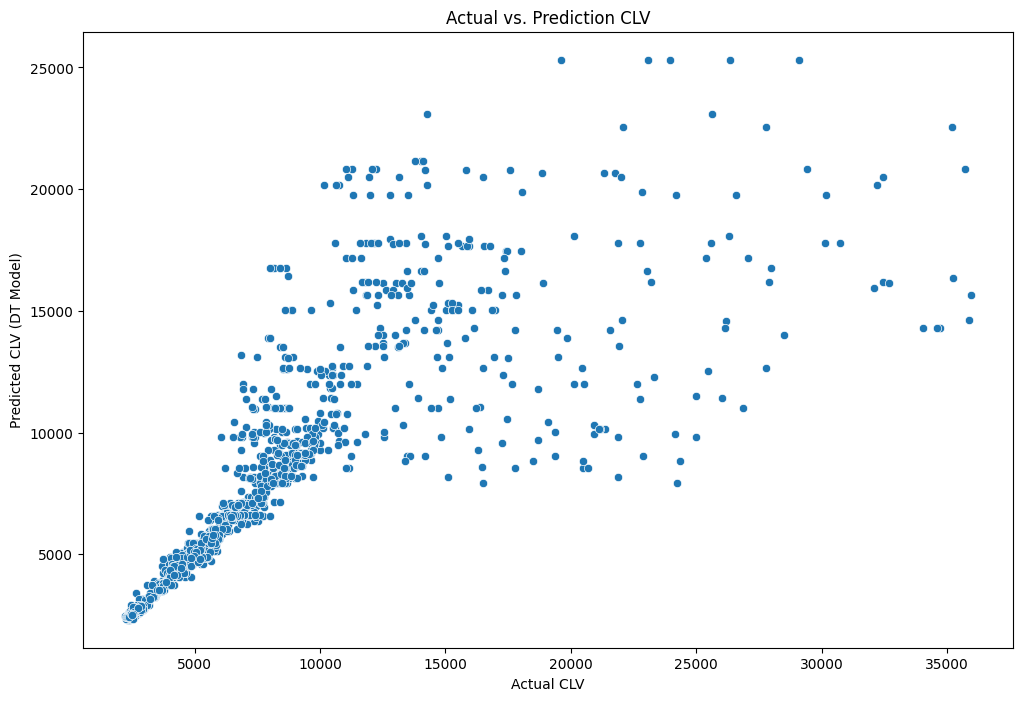

In [ ]:
# compare between hyperparameter-tuned model and actual y value
plt.figure(figsize=(12, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_best_dt).set(title='Actual vs. Prediction CLV',
                                               xlabel='Actual CLV',
                                               ylabel='Predicted CLV (DT Model)')

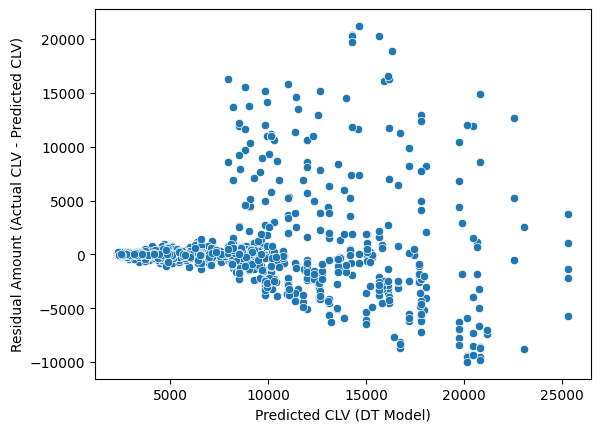

In [ ]:
#checking residual residual
residual_value = y_test - y_pred_best_dt

sns.scatterplot(x=y_pred_best_dt,y=residual_value)
plt.xlabel("Predicted CLV (DT Model)")
plt.ylabel("Residual Amount (Actual CLV - Predicted CLV)")
plt.show()

####<b>Conclusion for Difference Between Prediction and Actual CLV values</b>:
1. The prediction becomes less accurate when CLV is above approximately 10000. It is shown by the loss of positive correlation between actual and predicted CLV and increasing residual amount after predicted CLV >= 10000.

### Checking Feature Importance in the Model

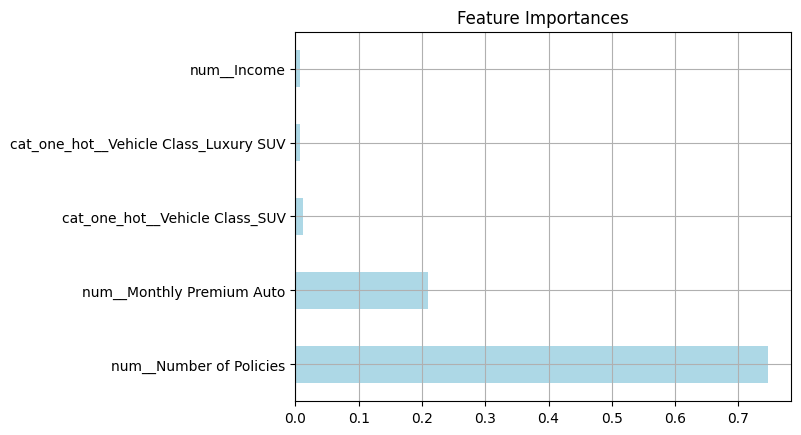

In [ ]:
# access the base model (regressor)
best_model = random_search_dt.best_estimator_
base_model = best_model.regressor_

# Get feature importances
importances = base_model.feature_importances_
# Plot feature importances
important_features = pd.Series(importances, preprocessor.get_feature_names_out()).sort_values(ascending = False).head()
important_features.plot(kind='barh', title='Feature Importances',color = "lightblue",grid = True)
plt.show()

####<b>Conclusion for Feature Importance of the Model</b>:
1. Based on the feature importance graph, the features:  
  a. Number of Policies (0.75).   
  b. Monthly Premium Auto (0.13).  
  c. Coverage (0.04).  
  d. Vehicle Class (Total: 0.08).  
  are the most influential ones for this model.

### Model Saving

In [ ]:
# save preprocessing step
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

# save model
with open('best_dt_model.pkl', 'wb') as file:
    pickle.dump(random_search_dt, file)

# Final Conclusion and Recommendation:


### Conclusion

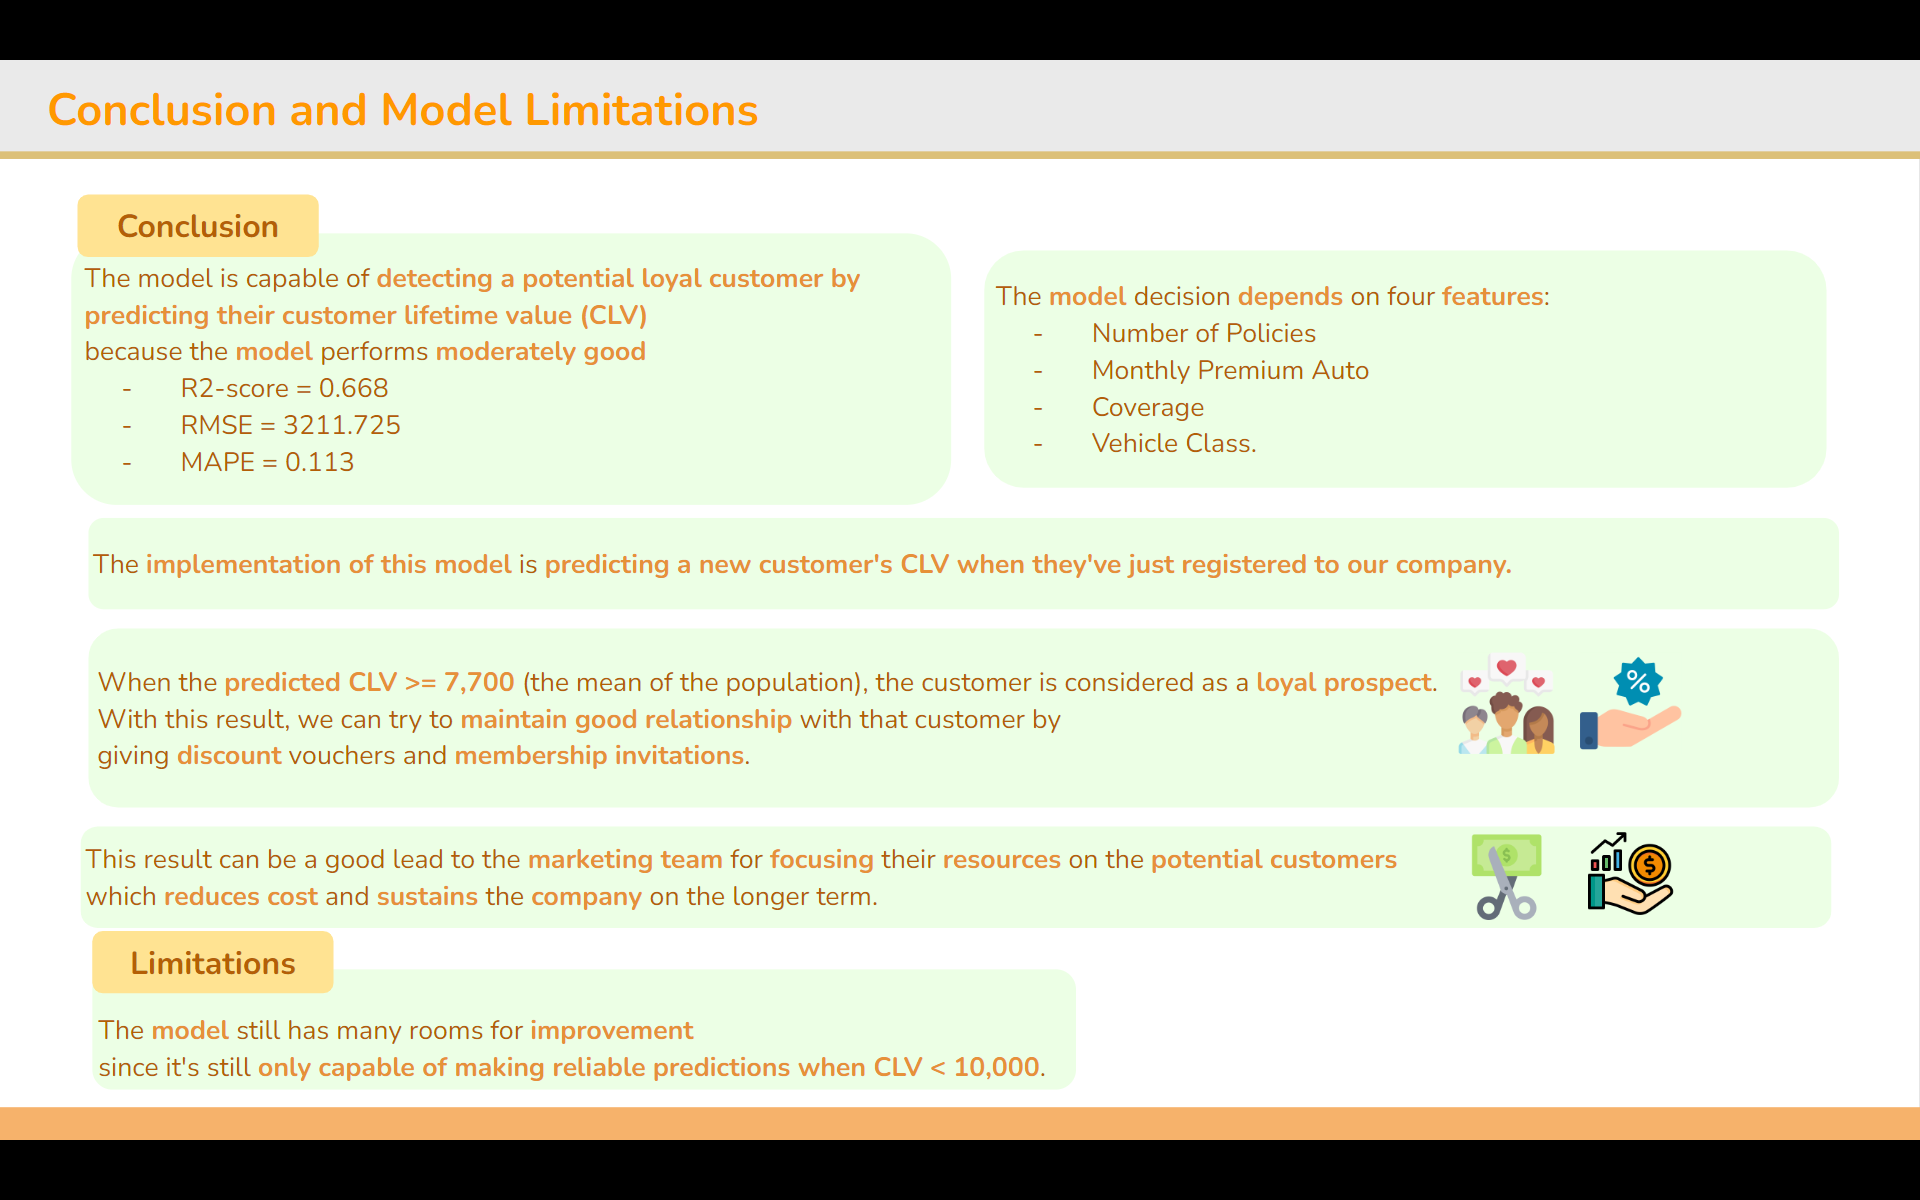

### Model Limitations

The model is capable of detecting a potential loyal customer by predicting their customer lifetime value (CLV) because the model performs moderately good (R2-score = 0.672, RMSE 3195, and MAPE = 0.119). The model decision depends on four features: Number of Policies, Monthly Premium Auto, Coverage, and Vehicle Class.

### Model Implementation Impact

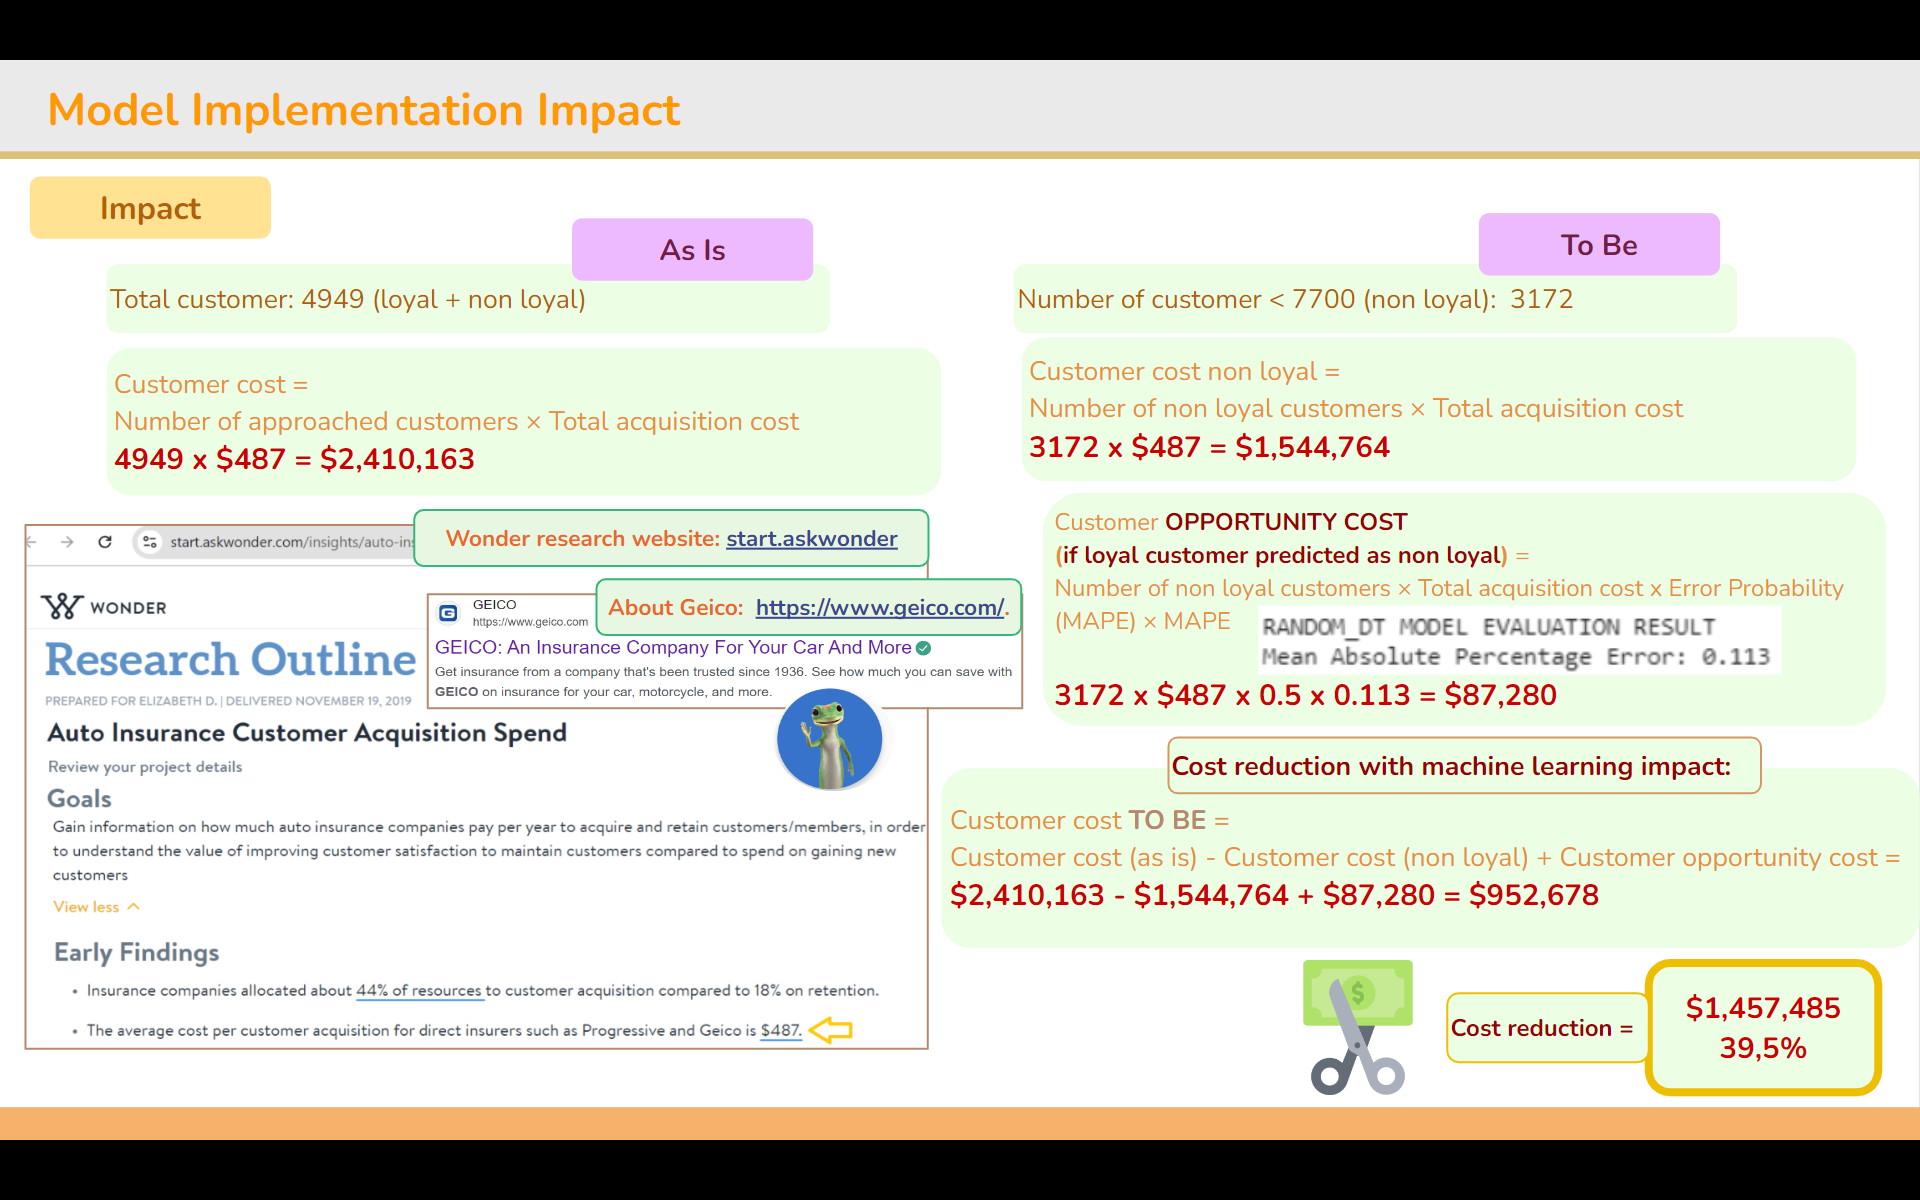

### Recommendations

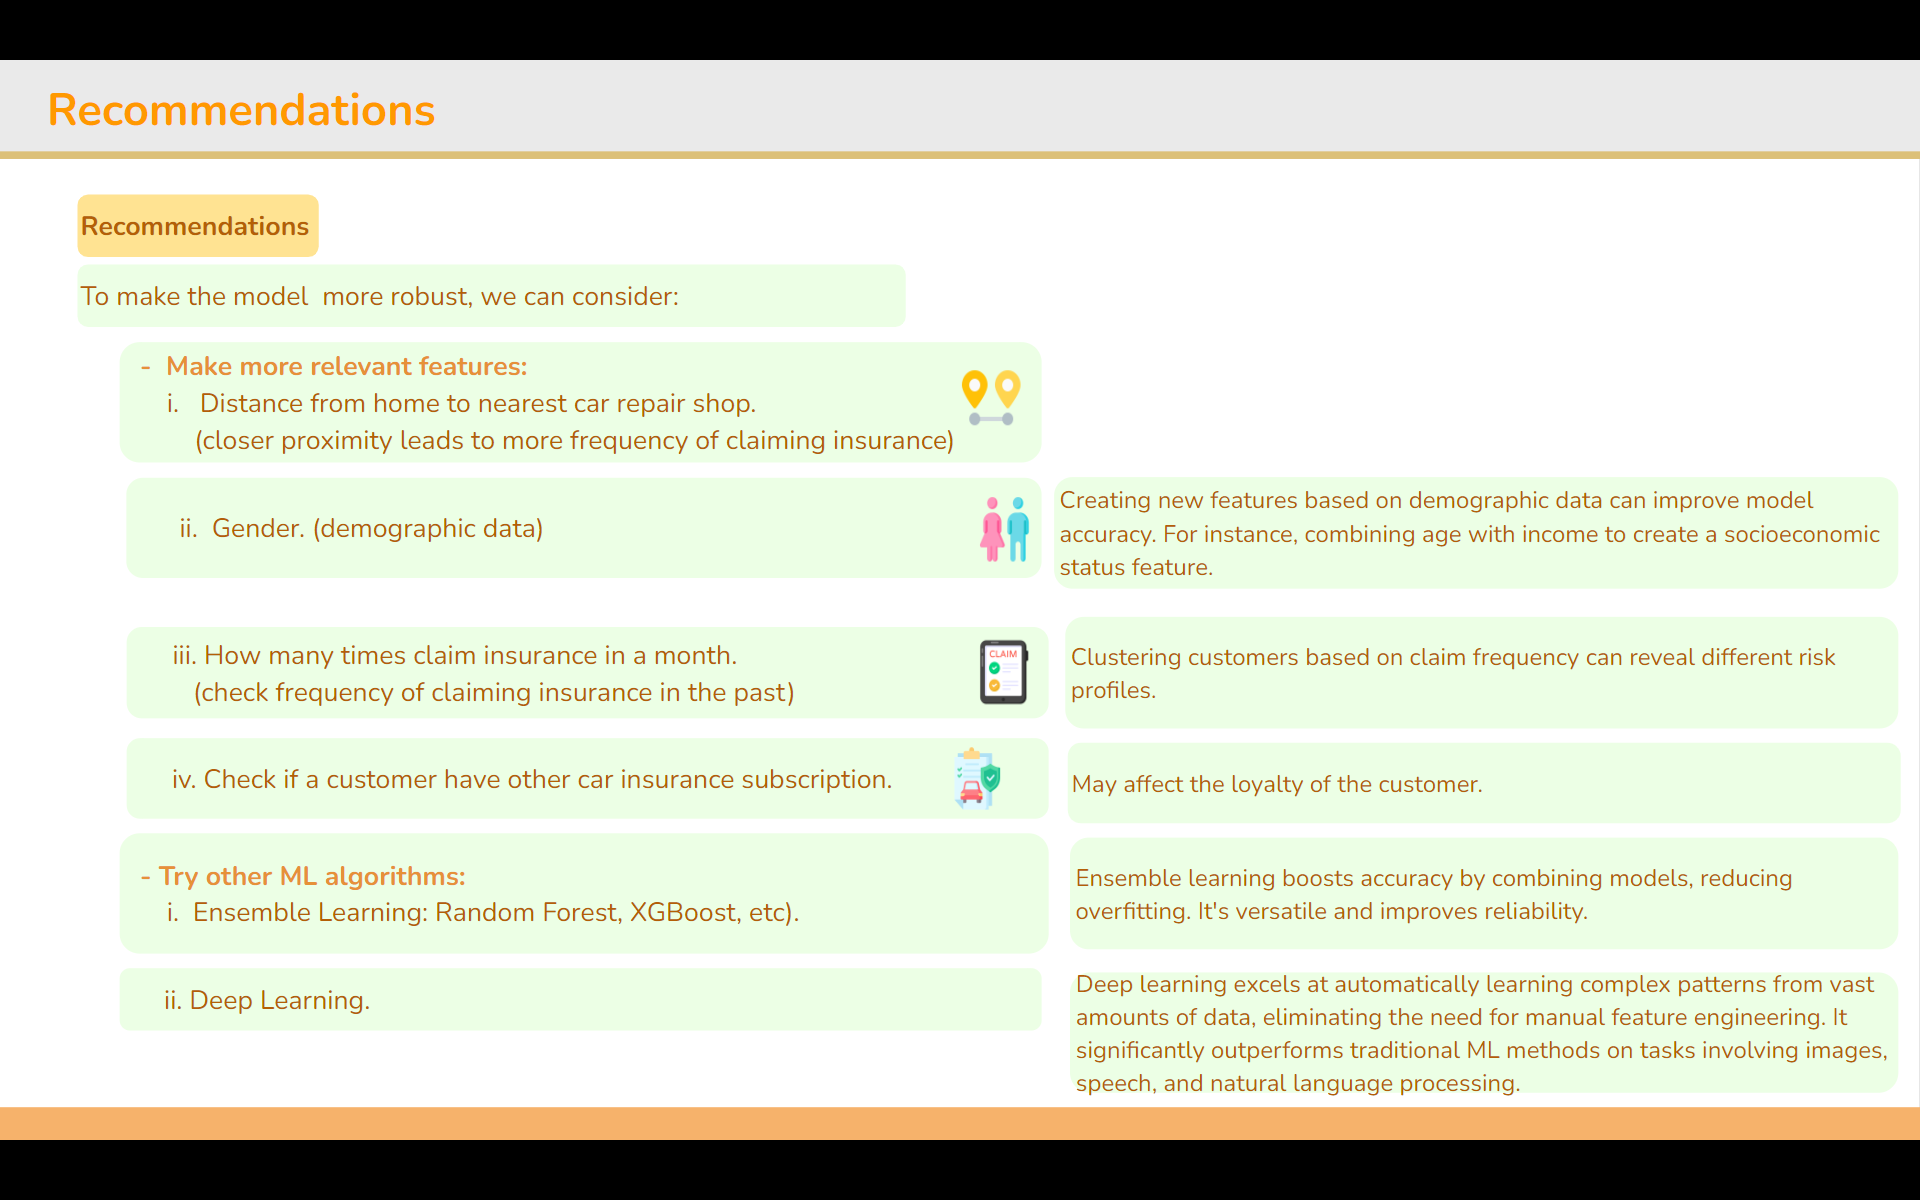